## Test de ce qu'on peut observer pour étudier la concurrence sur le commerce de l'eau-de-vie pour viz principale 2.2 
2 modalités géographiques étudiées pour la concurrence : 
* concurrence entre le port de Charente et les autres ports de la DFLR
* concurrence entre la DFLR et les autres directions des Fermes

Je veux produire : histogramme des exportations d'eau-de-vie en valeur  
- par bureau dans DFLR
- par direction des Fermes

Données utilisées : Toflit en 1789 (on n'a que les données par bureaux des Fermes pour 89)
* produits regardés : product_revolutionempire = 'Eaux-de-vie et liqueurs' (en réalité on pourrait affiner en enlevant quelques produits dans cette catégorie, et en ajoutant les produits 'vin et eau-de-vie' et 'vin et eau-de-vie' de la catégorie RE 'Boissons diverses et mélangées')

#### resultats : 

In [1]:
from poitousprint import Toflit
from vega import VegaLite
import pandas as pd

toflit_client = Toflit()

In [2]:
flows_national_export_edv = toflit_client.get_flows(
    year = 1789,
    export_import = 'Exports',
    product_revolutionempire = 'Eaux-de-vie et liqueurs')

In [3]:
print("Nombre d'exports d'eau de vie au niveau national en 1789  :", len(flows_national_export_edv))

Nombre d'exports d'eau de vie au niveau national en 1789  : 490


In [4]:
customs_regions_set = set()
customs_offices_set = set()
for f in flows_national_export_edv:
    if f['customs_region'] == 'La Rochelle':
        customs_offices_set.add(f['customs_office'])
    customs_regions_set.add(f['customs_region'])
    
print(customs_offices_set)
print(customs_regions_set)

{'Saint-Martin-de-Ré', 'Charente', 'Marennes', 'Rochefort', 'La Rochelle'}
{'', 'Flandre', 'Grenoble', 'Lorient', 'France', 'Amiens', 'Marseille', 'Narbonne', 'Langres', 'Caen', 'Rouen', 'Toulon', 'Valenciennes', 'Charleville', 'Bordeaux', 'Dunkerque', 'Auch', 'Montpellier', 'Besançon', 'Saint-Malo', 'Nantes', 'Bayonne', 'La Rochelle', 'Châlons'}


In [5]:
# years_list = [y + 1712 for y in range(120)]
customs_offices_list = ['Marennes', 'Saint-Martin-de-Ré', 'Rochefort', 'La Rochelle', 'Charente'] # à voir si besoin
customs_regions_list = ['', 'Rouen', 'Bayonne', 'Caen', 'Toulon', 'Châlons', 'Marseille', 'Saint-Malo', 'Grenoble', 'Amiens', 'Nantes', 'Valenciennes', 'Flandre', 'Langres', 'Dunkerque', 'Lorient', 'Charleville', 'Auch', 'La Rochelle', 'Montpellier', 'Besançon', 'France', 'Bordeaux', 'Narbonne']
# years = {}
customs_offices = {}
customs_regions = {}
# 
nb_no_custom_office_flow_1789 = 0
# pb customs_offices = set()

#c_x = {
#    'total' : nb,
#    'c_x_1': {
#      'c_x': c_x,
#       c_x.str.lower()+"_export": nb
#    },
#    ...,
#    'c_x_n': {
#      'c_x': c_x,
#       c_x.str.lower()+"_export": nb
#    }
#}


# initislisation de tous les sous dicts
for c_o in customs_offices_list:
    customs_offices[c_o] = {
        'custom_office': c_o,
        # "dflr_export": 0,
        'total_values_'+c_o.lower()+'_exports': 0,
        'total_nb_'+c_o.lower()+'_exports': 0
    }
customs_offices['total_values_dflr_exports'] = 0
customs_offices['total_nb_dflr_exports'] = 0

for c_r in customs_regions_list:
    customs_regions[c_r] = {
        'custom_region': c_r,
        # "france_export": 0,
        'total_values_'+c_r.lower()+"_exports": 0,
        'total_nb_'+c_r.lower()+'_exports': 0
    }
customs_regions['total_values_france_exports'] = 0
customs_regions['total_nb_france_exports'] = 0

for f in flows_national_export_edv: 
    # year = str(f['year'].split('.')[0])
    c_o = f['customs_office']
    c_r = f['customs_region']
    value = float(f['value']) if f['value'] != '' else 0
    # years[year]['france_export'] += value 
    customs_regions['total_values_france_exports'] += value
    customs_regions['total_nb_france_exports'] += 1
    customs_regions[c_r]['total_values_'+c_r.lower()+'_exports'] += value 
    customs_regions[c_r]['total_nb_'+c_r.lower()+'_exports'] += 1 
    
    if f['customs_region'] == 'La Rochelle':
        customs_offices['total_values_dflr_exports'] += value
        customs_offices['total_nb_dflr_exports'] += 1
        # customs_offices.add(f['customs_office'])
        customs_offices[c_o]['total_values_'+c_o.lower()+'_exports'] += value 
        customs_offices[c_o]['total_nb_'+c_o.lower()+'_exports'] += 1 
        if f['customs_office'] == '':
            nb_no_custom_office_flow_1789 += 1

part_by_c_o = []
for c_o, values in customs_offices.items():
    if c_o not in ['total_values_dflr_exports', 'total_nb_dflr_exports']:
        part_by_c_o.append({
            "customs_office": c_o,
            "type": "tout DFLR", # jsp
            "values_portion": values['total_values_'+c_o.lower()+'_exports'] / customs_offices['total_values_dflr_exports'] if  customs_offices['total_values_dflr_exports'] > 0 else 0,
            "nb_portion":values['total_nb_'+c_o.lower()+'_exports'] / customs_offices['total_nb_dflr_exports'] if  customs_offices['total_nb_dflr_exports'] > 0 else 0
        })

part_by_c_r = []
for c_r, values in customs_regions.items():
    if c_r not in ['total_values_france_exports', 'total_nb_france_exports']:
        part_by_c_r.append({
            "customs_region": c_r,
            "type": "toute la France", # jsp
            "values_portion": values['total_values_'+c_r.lower()+'_exports'] / customs_regions['total_values_france_exports'] if  customs_regions['total_values_france_exports'] > 0 else 0,
            "nb_portion":values['total_nb_'+c_r.lower()+'_exports'] / customs_regions['total_nb_france_exports'] if  customs_regions['total_nb_france_exports'] > 0 else 0
        })
        
# print(customs_regions)

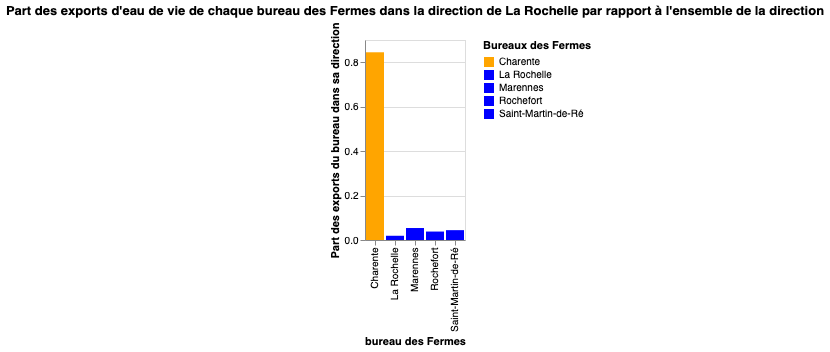

In [6]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Part des exports d'eau de vie de chaque bureau des Fermes dans la direction de La Rochelle par rapport à l'ensemble de la direction",
    "mark": {"type": "bar", "tooltip": {"content": "data"}},
    "encoding": {
        "x": {
            "field": "customs_office",
            "type": "ordinal", 
            "title": "bureau des Fermes"
        },
        "y": {
            "type": "quantitative",
            "field": "values_portion",
            "title": "Part des exports du bureau dans sa direction"
        },
        "color": {
            "type": "nominal",
            "field": "customs_office",
            "title": "Bureaux des Fermes",
            "scale": {
                "range": ["orange", "blue", "blue", "blue", "blue"]
            }
        }
    }
}, pd.DataFrame([c_o for c_o in part_by_c_o]))

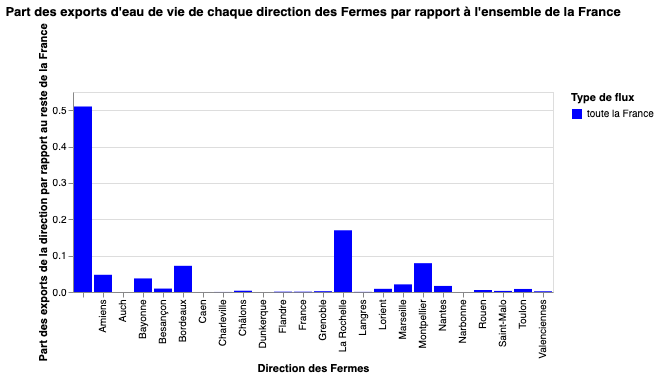

In [7]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Part des exports d'eau de vie de chaque direction des Fermes par rapport à l'ensemble de la France",
    "mark": {"type": "bar", "tooltip": {"content": "data"}},
    "encoding": {
        "x": {
            "field": "customs_region",
            "type": "ordinal", 
            "title": "Direction des Fermes"
        },
        "y": {
            "type": "quantitative",
            "field": "values_portion",
            "title": "Part des exports de la direction par rapport au reste de la France"
        },
        "color": {
            "type": "nominal",
            "field": "type",
            "title": "Type de flux",
            "scale": {
                "range": ["blue", "blue", "blue","blue", "blue", "blue", "blue", "blue","blue","blue","blue","blue","blue","orange", "blue", "blue", "blue", "blue", "blue","blue","blue","blue","blue","blue"]
            }
        }
    }
}, pd.DataFrame([c_r for c_r in part_by_c_r]))

In [8]:
print("Le nombre d'exports de d'eau de vie rattachés à la DFLR, mais pas à un bureau particulier s'élève à ", nb_no_custom_office_flow_1789)

Le nombre d'exports de d'eau de vie rattachés à la DFLR, mais pas à un bureau particulier s'élève à  0
